In [1]:
import utils
import skimage
import skimage.morphology
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def extract_boundary(im: np.ndarray) -> np.ndarray:
    """
        A function that extracts the inner boundary from a boolean image.

        args:
            im: np.ndarray of shape (H, W) with boolean values (dtype=np.bool)
        return:
            (np.ndarray) of shape (H, W). dtype=np.bool
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    # You can also define other helper functions
    structuring_element = np.ones((3, 3), dtype=bool) # Stucturing element for erosion
    # Erosion
    boundary = skimage.morphology.binary_erosion(im, footprint=structuring_element)
    # A_boundary = A - (A erosion B)
    boundary = im.astype(int) - boundary.astype(int)
    return boundary.astype(bool)
    ### END YOUR CODE HERE ### 

In [3]:
if __name__ == "__main__":
    im = utils.read_image("blood-vessels.png")
    binary_image = (im != 0)
    boundary = extract_boundary(binary_image)

    assert im.shape == boundary.shape, "Expected image shape ({}) to be same as resulting image shape ({})".format(
            im.shape, boundary.shape)
    assert boundary.dtype == bool, "Expected resulting image dtype to be bool. Was: {}".format(
            boundary.dtype)

    boundary = utils.to_uint8(boundary)
    utils.save_im("blood-vessels-boundary.png", boundary)


Reading image: images\blood-vessels.png
Saving image to: image_processed\blood-vessels-boundary.png


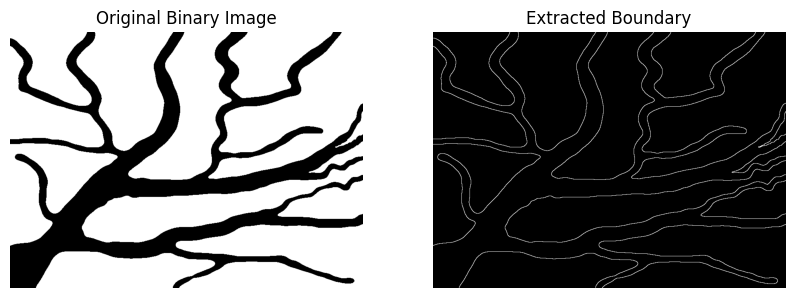

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(binary_image, cmap='gray')
axes[0].set_title('Original Binary Image')
axes[0].axis('off')
axes[1].imshow(boundary, cmap='gray')
axes[1].set_title('Extracted Boundary')
axes[1].axis('off')
plt.show()
